# 导入包

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

base = "/content/drive/MyDrive/Colab Notebooks/AndrewNg-Machine-Learning-Homework/ex5-Regularized-Linear-Regression-and-Bias-v.s-Variance"

# 导入数据

In [3]:
path = base + "/ex5data1.mat"
data = io.loadmat(path)
data

{'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]), 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-12.76686065],
        [ 34.05450539],
        [ 39.22350028],
        [  1.97449674],
        [ 29.6217551 ],
        [-23.66962971],
        [ -9.01180139],
        [-55.94057091],
        [-35.70859752],
        [  9.51020533]]), 'Xval': array([[-16.74653578],
        [-14.57747075],
        [ 34.51575866],
        [-47.01007574],
        [ 36.97511905],
        [-40.68611002],
        [ -4.47201098],
        [ 26.533

# 数据切割
This dataset is divided into three parts:
+ A training set that your model will learn on: X, y
+ A cross validation set for determining the regularization parameter:
Xval, yval
+ A test set for evaluating performance. These are “unseen” examples
which your model did not see during training: Xtest, ytest

In [4]:
X = data["X"]
y = data["y"]
Xtest = data["Xtest"]
ytest = data["ytest"]
Xval = data["Xval"]
yval = data["yval"]

print("X：", X)
print("y：", y)
print("Xtest：", Xtest)
print("ytest：", ytest)
print("Xval：", Xval)
print("yval：", yval)

X： [[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]
 [ -8.94145794]
 [ 15.30779289]
 [-34.70626581]
 [  1.38915437]
 [-44.38375985]
 [  7.01350208]
 [ 22.76274892]]
y： [[ 2.13431051]
 [ 1.17325668]
 [34.35910918]
 [36.83795516]
 [ 2.80896507]
 [ 2.12107248]
 [14.71026831]
 [ 2.61418439]
 [ 3.74017167]
 [ 3.73169131]
 [ 7.62765885]
 [22.7524283 ]]
Xtest： [[-33.31800399]
 [-37.91216403]
 [-51.20693795]
 [ -6.13259585]
 [ 21.26118327]
 [-40.31952949]
 [-14.54153167]
 [ 32.55976024]
 [ 13.39343255]
 [ 44.20988595]
 [ -1.14267768]
 [-12.76686065]
 [ 34.05450539]
 [ 39.22350028]
 [  1.97449674]
 [ 29.6217551 ]
 [-23.66962971]
 [ -9.01180139]
 [-55.94057091]
 [-35.70859752]
 [  9.51020533]]
ytest： [[ 3.31688953]
 [ 5.39768952]
 [ 0.13042984]
 [ 6.1925982 ]
 [17.08848712]
 [ 0.79950805]
 [ 2.82479183]
 [28.62123334]
 [17.04639081]
 [55.38437334]
 [ 4.07936733]
 [ 8.27039793]
 [31.32355102]
 [39.15906103]
 [ 8.08727989]
 [24.11134389]
 [ 2.4773548 ]
 [ 6.56606472]

# 多项式回归
$
\begin{aligned}
h_{\theta}(x) &=\theta_{0}+\theta_{1} *(\text { waterLevel })+\theta_{2} *(\text { waterLevel })^{2}+\cdots+\theta_{p} *(\text { waterLevel })^{p} \\
&=\theta_{0}+\theta_{1} x_{1}+\theta_{2} x_{2}+\ldots+\theta_{p} x_{p}
\end{aligned}
$
+ 这里设置p=8



## 创造多项式特征

In [17]:
def createPolynomial(X, p):  # 不包括偏置项 +1
  # X - (m, n)

  X_poly = np.ones([X.shape[0], p])

  base = X[:, 0]
  X_poly[:, 0] = base
  for i in range(1, p):
    base = base * base
    X_poly[:, i] = base
  return X_poly

In [18]:
X_poly = createPolynomial(X, 8)
print(X_poly)

[[-1.59367581e+001  2.53980260e+002  6.45059724e+004  4.16102047e+009
   1.73140914e+019  2.99777760e+038  8.98667054e+076  8.07602473e+153]
 [-2.91529792e+001  8.49896197e+002  7.22323546e+005  5.21751305e+011
   2.72224425e+023  7.41061373e+046  5.49171959e+093  3.01589840e+187]
 [ 3.61895486e+001  1.30968343e+003  1.71527069e+006  2.94215353e+012
   8.65626738e+024  7.49309649e+049  5.61464950e+099  3.15242891e+199]
 [ 3.74921873e+001  1.40566411e+003  1.97589159e+006  3.90414759e+012
   1.52423684e+025  2.32329794e+050  5.39771331e+100  2.91353089e+201]
 [-4.80588295e+001  2.30965109e+003  5.33448815e+006  2.84567638e+013
   8.09787407e+026  6.55755645e+053  4.30015466e+107  1.84913301e+215]
 [-8.94145794e+000  7.99496701e+001  6.39194974e+003  4.08570215e+007
   1.66929621e+015  2.78654983e+030  7.76485993e+060  6.02930497e+121]
 [ 1.53077929e+001  2.34328523e+002  5.49098568e+004  3.01509237e+009
   9.09078199e+018  8.26423173e+037  6.82975260e+075  4.66455206e+151]
 [-3.47062658

## 特征归一化
公式：
$$
X_j = \frac{X_j-\mu _j}{max(X_j)-min(X_j)}
$$

In [19]:
def featureNormalization(X): # 不包括偏置项 +1
  # X - (m, n)

  X_scale = X
  for j in range(X.shape[1]):
    X_scale[:, j] = (X[:, j] - np.mean(X[:, j])) / (np.max(X[:, j] - np.min(X[:, j])))
  return X_scale

In [20]:
X_scale = featureNormalization(X_poly)
print(X_scale)

[[-1.26840477e-01 -2.57797406e-01 -2.29670164e-01 -1.55259277e-01
  -1.09613588e-01 -8.99099147e-02 -8.38458244e-02 -8.33364850e-02]
 [-2.81323984e-01  4.29585471e-04 -1.06355984e-01 -1.37070621e-01
  -1.09277442e-01 -8.99098017e-02 -8.38458244e-02 -8.33364850e-02]
 [ 4.82460367e-01  1.99668213e-01  7.97814309e-02 -5.20151931e-02
  -9.89240544e-02 -8.97956481e-02 -8.38458113e-02 -8.33364850e-02]
 [ 4.97686822e-01  2.41259318e-01  1.28637306e-01 -1.82097307e-02
  -9.07909309e-02 -8.95556214e-02 -8.38456988e-02 -8.33364850e-02]
 [-5.02313178e-01  6.32982081e-01  7.58238274e-01  8.44594501e-01
   8.90386390e-01  9.10090085e-01  9.16154176e-01  9.16663515e-01]
 [-4.50728902e-02 -3.33209712e-01 -2.40564192e-01 -1.55404064e-01
  -1.09613610e-01 -8.99099147e-02 -8.38458244e-02 -8.33364850e-02]
 [ 2.38374949e-01 -2.66313051e-01 -2.31469047e-01 -1.55299546e-01
  -1.09613599e-01 -8.99099147e-02 -8.38458244e-02 -8.33364850e-02]
 [-3.46235972e-01  1.54100084e-01  3.02189122e-02 -8.14317554e-02
  -

## 线性假设函数
公式：
$$
h_\theta(X)=X\theta
$$
其中：$X$为m×(n+1)维，$\theta$为(n+1)×1维。

In [21]:
def Hypothesis(X, theta):
  # X - (m, n+1)
  # theta - (n+1, 1)
  return X @ theta

## 正则化的线性回归代价函数
公式：
$$
J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2+\frac{\lambda}{2m}\sum_{i=1}^n\theta_j^2
$$

***
实现公式：
$$
J(\theta)=\frac{1}{2m}(h_\theta(X)-y)^T(h_\theta(X)-y)+\frac{\lambda}{2m}\theta^T\theta
$$

In [22]:
def ComputeLinearRegressionCostReg(X, y, theta, lambd):
  # X - (m, n+1)
  # y - (m, 1)
  # theta - (n+1, 1)

  m = X.shape[0]
  y_hat = Hypothesis(X, theta)

  first = (y_hat - y).T @ (y_hat - y) / (2 * m)
  reg = lambd * (theta.T @ theta) / (2 * m)

  ret = (float)(first + reg)
  return ret

## 正则化的线性回归梯度
公式：
$$
\begin{aligned}
\frac{\partial J(\theta )}{\partial \theta _0} &=\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ for\ j = 0\\
\frac{\partial J(\theta )}{\partial \theta _0} &=(\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} )+\frac{\lambda }{m}\theta _j\ \ \ for\ j \ge 1
\end{aligned}
$$

***
实现公式：
$$
\frac{\partial J(\theta )}{\partial \theta} = \frac{1}{m}X^T(h_\theta(X)-y)+\frac{\lambda}{m}\Theta
$$

其中：$\Theta = \begin{bmatrix}
0 \\
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_n
\end{bmatrix}_{(n+1)\times 1}$

In [23]:
def ComputeLinearRegressionGradientReg(X, y, theta, lambd):
  # X - (m, n+1)
  # y - (m, 1)
  # theta - (n+1, 1)

  m = X.shape[0]
  y_hat = Hypothesis(X, theta)

  Theta = np.insert(theta, 0, values=0, axis=0)

  first = X.T @ (y_hat - y) / m
  reg = lambd * theta / m

  return (float)(first + reg)

## 梯度下降

In [24]:
def GradientDescent(X, y, theta, lambd, Iterations, LearningRate):
  # X - (m, n+1)
  # y - (m, 1)
  # theta - (n+1, 1)

  cost = np.zeros(Iterations)
  for i in range(Iterations):
    theta -= LearningRate * ComputeLinearRegressionGradientReg(X, y, theta, lambd)
    cost[i] = ComputeLinearRegressionCostReg(X, y, theta, lambd)

  return theta

In [25]:
def runGradientDescent(X, y, lambd, Iterations, LearningRate):
  # X - (m, n+1)
  # y - (m, 1)

  theta = np.zeros([X.shape[1], 1]) # theta - (n+1, 1)

  theta = GradientDescent(X, y, theta, lambd, Iterations, LearningRate)
  return theta

In [42]:
def plotLearningCurve(X, y, Xval, yval, lambd, Iterations, LearningRate):
  trainCost = np.zeros(X.shape[0] + 1)
  valCost = np.zeros(X.shape[0] + 1)

  for i in range(1, X.shape[0] + 1):
    theta = runGradientDescent(X[:i, ], y[:i, ], lambd, Iterations, LearningRate)

    trainCost[i] = ComputeLinearRegressionCostReg(X[:i, ], y[:i, ], theta, lambd)
    valCost[i] = ComputeLinearRegressionCostReg(Xval, yval, theta, lambd)

  return trainCost, valCost

In [119]:
X_poly = createPolynomial(X, 8)
X_scale = featureNormalization(X_poly)
X_scale_insert = np.insert(X_scale, 0, values=1, axis=1) # X_scale_insert - (12, 9)
Xval_poly = createPolynomial(Xval, 8)
Xval_scale = featureNormalization(Xval_poly)
Xval_scale_insert = np.insert(Xval_scale, 0, values=1, axis=1) # Xval_scale_insert - (12, 9)

trainCost2, valCost2 = plotLearningCurve(X_scale_insert, y, Xval_scale_insert, yval, lambd=10, Iterations=1500, LearningRate=0.1)

print(trainCost2, valCost2)

[  0.           2.03479303   1.22649987 174.30974219 252.91901911
 202.35038895 169.0897091  150.75019579 132.19152339 117.62881641
 105.90082441  96.48336359  98.91884117] [  0.         161.81974267 160.90345713 128.05387816 108.83516675
 108.96284579 109.76620619 106.80245531 107.32002224 107.70096096
 107.9199711  107.40386632 103.89628418]


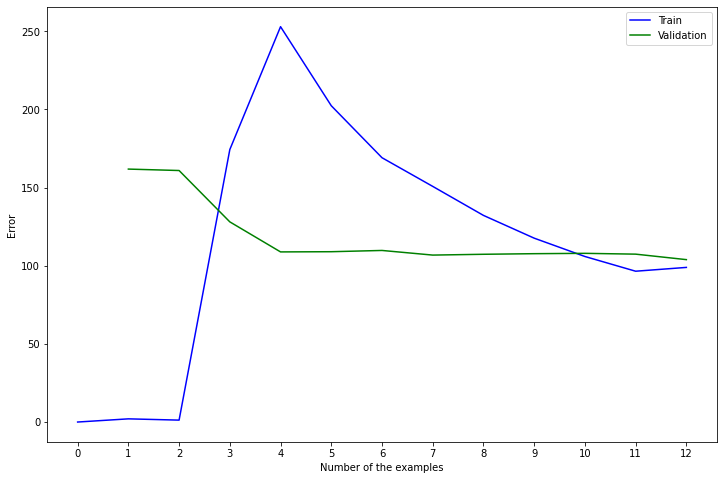

In [120]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(X_scale_insert.shape[0] + 1), trainCost2, color="blue", label="Train")
ax.plot(np.arange(1, X_scale_insert.shape[0] + 1), valCost2[1:,], color="green", label="Validation")
ax.legend()
ax.set_xlabel("Number of the examples")
ax.set_ylabel("Error")
plt.xticks(np.arange(0, 13, 1))
# plt.yticks(np.arange(0, 101, 10))
plt.show()

## 找到最佳的λ
<font color='red'>似乎有问题？</font>

In [95]:
def findBestLambda(X, y, Xval, yval, l_candidate):
  train_cost, cv_cost = [], []
  Iterations, LearningRate = 1500, 0.1
  for lambd in l_candidate:
    theta = runGradientDescent(X, y, lambd, Iterations, LearningRate)

    tc = ComputeLinearRegressionCostReg(X, y, theta, lambd)
    vc = ComputeLinearRegressionCostReg(Xval, yval, theta, lambd)

    train_cost.append(tc)
    cv_cost.append(vc)
  
  fig, ax = plt.subplots(figsize=(12, 8))
  ax.plot(l_candidate, train_cost, color="blue", label="Train")
  ax.plot(l_candidate, cv_cost, color="green", label="Validation")
  ax.legend()
  ax.set_xlabel("lambda")
  ax.set_ylabel("Error")
  plt.show()

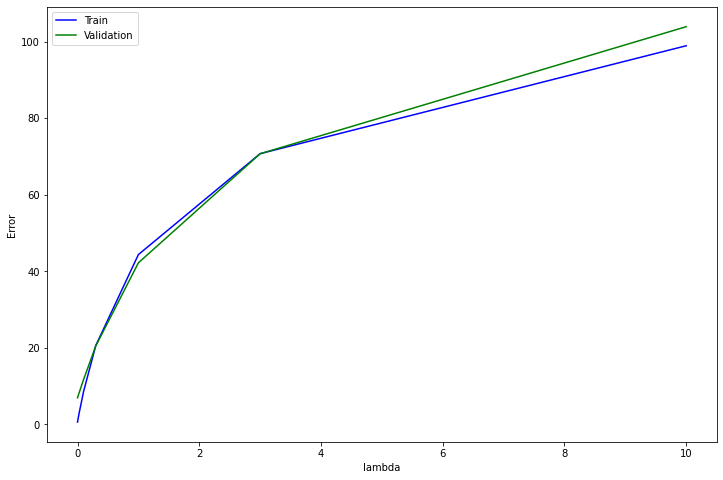

In [106]:
l_candidate = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

X_poly = createPolynomial(X, 8)
X_scale = featureNormalization(X_poly)
X_scale_insert = np.insert(X_scale, 0, values=1, axis=1) # X_scale_insert - (12, 9)
Xval_poly = createPolynomial(Xval, 8)
Xval_scale = featureNormalization(Xval_poly)
Xval_scale_insert = np.insert(Xval_scale, 0, values=1, axis=1) # Xval_scale_insert - (12, 9)

lambd = findBestLambda(X_scale_insert, y, Xval_scale_insert, yval, l_candidate)

## 计算测试误差


In [123]:
def ComputeTestCost(X, y, Xtest, ytest, lambd, Iterations, LearningRate):
  theta = runGradientDescent(X, y, lambd, Iterations, LearningRate)

  test_cost = ComputeLinearRegressionCostReg(Xtest, ytest, theta, lambd)

  return test_cost

In [124]:
Xtest_poly = createPolynomial(Xtest, 8)
Xtest_scale = featureNormalization(Xtest_poly)
Xtest_scale_insert = np.insert(Xtest_scale, 0, values=1, axis=1) # Xval_scale_insert - (12, 9)

ComputeTestCost(X_scale_insert, y, Xtest_scale_insert, ytest, lambd=0, Iterations=1500, LearningRate=0.1)

11.55765716677366